In [124]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt

import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb

training_data_VT2026 = pd.read_csv('../Training/training_data_VT2026.csv')




In [125]:
training_data_VT2026.head()




,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.0,0,0.0,16.3,31.6,16.0,low_bike_demand
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.0,0,0.0,23.9,85.7,16.0,low_bike_demand
2,21,3,8,0,1,1,26.9,21.8,73.39,0.0,0,0.0,0.0,81.1,16.0,low_bike_demand
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.0,0,0.0,19.2,0.0,16.0,low_bike_demand
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.0,0,0.0,10.5,44.6,16.0,low_bike_demand


In [126]:


#copy data
df = training_data_VT2026.copy()

#make months and days of week make sense by making in circular
N1 = 12
df['month_sin'] = np.sin(2 * np.pi * df['month'] / N1)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / N1)



N3 = 24
df['hour_of_the_day_sin'] = np.sin(2* np.pi * df['hour_of_day'] / N3)
df['hour_of_the_day_cos'] = np.cos(2* np.pi * df['hour_of_day'] / N3)

# one hot encode day of week 
df = pd.get_dummies(df, columns=['day_of_week'], prefix='day')


#make snow binary
df['snow_or_not'] = (df['snowdepth'] > 0).astype(int)





#split into features and target variable
X = df.drop('increase_stock', axis=1)
y = df['increase_stock']
X.head()

print('unika klasser i target variabeln:', y.unique())

for label in y.unique():
    print(f"Kovarians mellan features för klass '{label}':")
    
    # Filtrera rader som tillhör denna klass
    class_data = X[y == label]
    
    # Beräkna kovariansmatris
    cov_matrix = class_data.cov()
    print(cov_matrix)
    print()


unika klasser i target variabeln: <StringArray>
['low_bike_demand', 'high_bike_demand']
Length: 2, dtype: str
Kovarians mellan features för klass 'low_bike_demand':
                     hour_of_day      month   holiday   weekday  summertime  \
hour_of_day            53.194313  -0.720359  0.030595 -0.052808   -0.167469   
month                  -0.720359  12.937471 -0.006084  0.113784    0.080803   
holiday                 0.030595  -0.006084  0.032437  0.008902   -0.012351   
weekday                -0.052808   0.113784  0.008902  0.195038   -0.000644   
summertime             -0.167469   0.080803 -0.012351 -0.000644    0.241107   
temp                    5.266232   7.104700 -0.103824  0.271633    3.196947   
dew                    -4.417939   9.746323 -0.125798  0.204771    3.384159   
humidity              -37.254165  11.471004 -0.078586 -0.109322    1.423158   
precip                  0.041367   0.023795 -0.001139  0.011890    0.013741   
snow                    0.000000   0.000000  

In [127]:
df = df.drop('month', axis=1)
df = df.drop('hour_of_day', axis=1)
df = df.drop('snowdepth', axis=1)
df = df.drop('snow', axis=1)


In [128]:
#df now:

df.head()

,holiday,weekday,summertime,temp,dew,humidity,precip,windspeed,cloudcover,visibility,...,hour_of_the_day_sin,hour_of_the_day_cos,day_0,day_1,day_2,day_3,day_4,day_5,day_6,snow_or_not
0,0,0,0,-7.2,-15.0,53.68,0.0,16.3,31.6,16.0,...,0.965926,0.258819,False,False,False,False,False,True,False,0
1,0,1,0,-1.3,-12.8,40.97,0.0,23.9,85.7,16.0,...,-0.707107,0.707107,False,False,False,False,True,False,False,0
2,0,1,1,26.9,21.8,73.39,0.0,0.0,81.1,16.0,...,-0.707107,0.707107,False,False,False,True,False,False,False,0
3,0,0,0,3.1,-4.0,59.74,0.0,19.2,0.0,16.0,...,0.258819,0.965926,False,False,False,False,False,False,True,0
4,0,1,0,11.7,-11.4,18.71,0.0,10.5,44.6,16.0,...,-0.965926,-0.258819,True,False,False,False,False,False,False,0


In [72]:
snow_stats = df["snow"].value_counts().sort_index()
print(snow_stats)
snowdepth_stats = df["snowdepth"].value_counts().sort_index()
print(snowdepth_stats)
print(df.shape[0])

snow
0    1600
Name: count, dtype: int64
snowdepth
0.00    1542
0.01       2
0.02       2
0.03       5
0.04       1
0.05       3
0.08       1
0.10       5
0.11       2
0.15       1
0.20       2
0.23       1
0.25       1
0.26       1
0.29       1
0.30       4
0.37       1
0.40       2
0.45       1
0.60       1
0.63       1
0.65       1
0.67       1
0.70       1
0.73       1
0.78       1
1.27       1
1.30       1
2.00       1
2.09       1
2.16       1
2.24       1
2.29       1
3.87       1
4.94       1
5.23       1
5.43       1
5.64       1
6.13       1
6.68       1
6.71       1
Name: count, dtype: int64
1600


In [ ]:
#compare covariances between classes
#scale to be able to interpret the results
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X) # this is (x-mean)/std. dont do fit for test data, only transform
#make it a dataframe again to be able to use the cov function
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

head = X_scaled.head()
print(head)

labels = y.unique()
cov1 = X_scaled[y == labels[0]].cov()
cov2 = X_scaled[y == labels[1]].cov()

diff = cov1 - cov2
fro_norm = np.linalg.norm(diff)  # storleken på skillnaden
print(f"Frobeniusnormen av skillnaden mellan {labels[0]} och {labels[1]}: {fro_norm:.2f}")

   hour_of_day  day_of_week     month   holiday   weekday  summertime  \
0    -0.917228     0.982689 -1.583465 -0.185094 -1.564697   -1.344254   
1     1.386190     0.485754 -1.583465 -0.185094  0.639101   -1.344254   
2     1.386190    -0.011181  0.443370 -0.185094  0.639101    0.743907   
3    -1.493083     1.479624 -1.583465 -0.185094 -1.564697   -1.344254   
4     0.810335    -1.501986 -1.004369 -0.185094  0.639101   -1.344254   

       temp       dew  humidity    precip  snow  snowdepth  windspeed  \
0 -2.419627 -2.269781 -0.537283 -0.132609   0.0  -0.101439   0.414935   
1 -1.782607 -2.050293 -1.203654 -0.132609   0.0  -0.101439   1.395045   
2  1.262128  1.401656  0.496090 -0.132609   0.0  -0.101439  -1.687144   
3 -1.307542 -1.172340 -0.219564 -0.132609   0.0  -0.101439   0.788924   
4 -0.379006 -1.910618 -2.370721 -0.132609   0.0  -0.101439  -0.333044   

   cloudcover  visibility  month_sin  month_cos  day_of_week_sin  \
0   -0.999503    0.282338   0.678434   1.227255       

frobeniusnormen är hyfsat stort, vilket tyder på att det finns skillnader i covarianserna mellan de två klasserna. Det kan vara värt att undersöka vilka specifika variabler som bidrar mest till denna skillnad, kanske genom att titta på de enskilda elementen i diff-matrisen.


[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


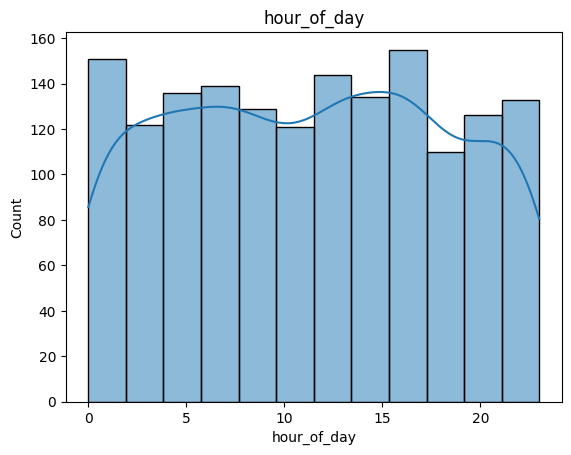

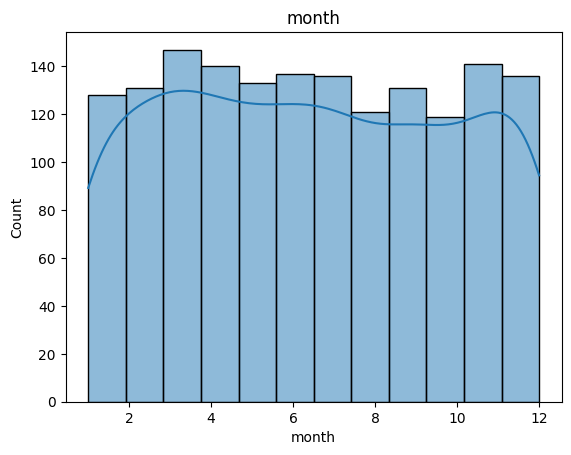

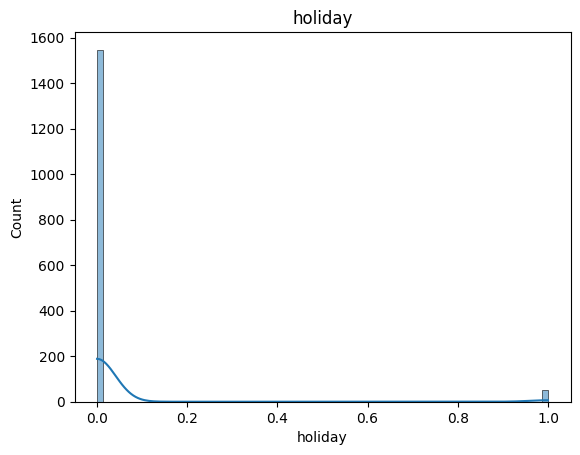

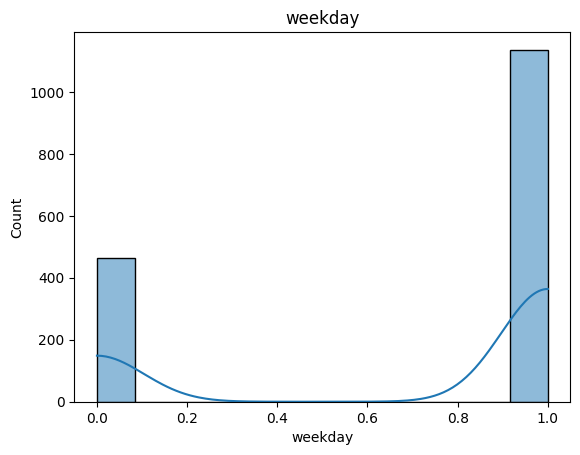

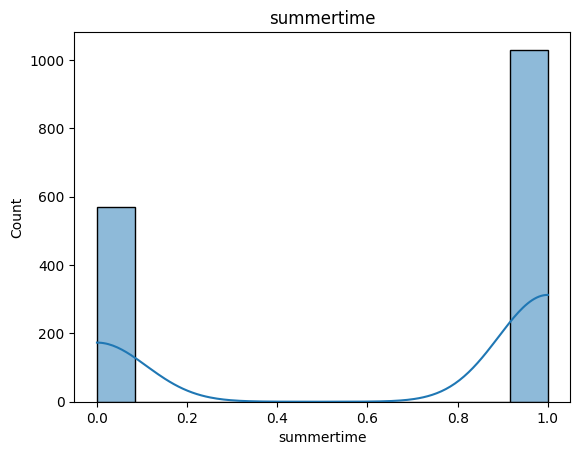

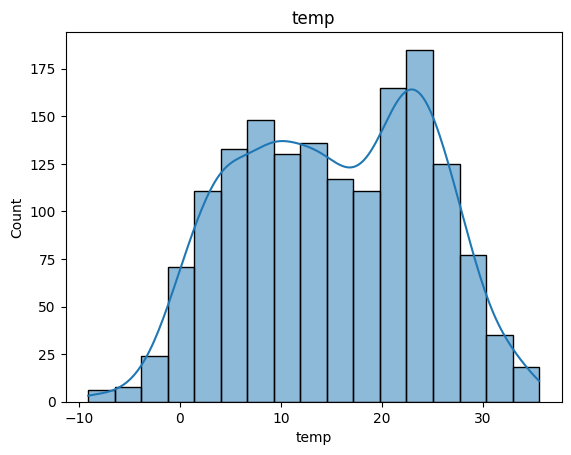

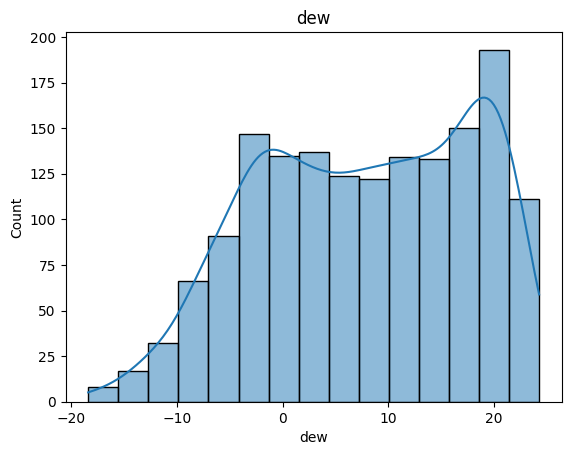

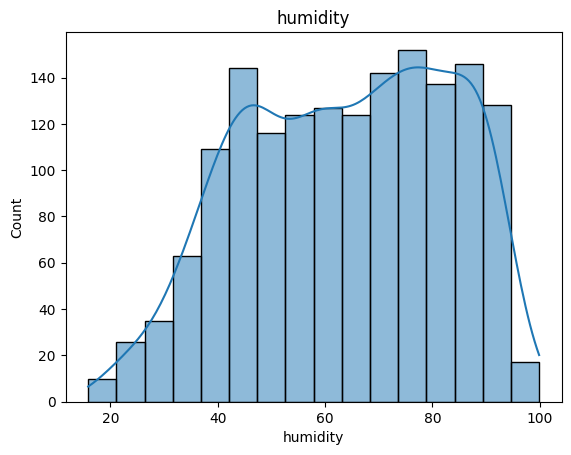

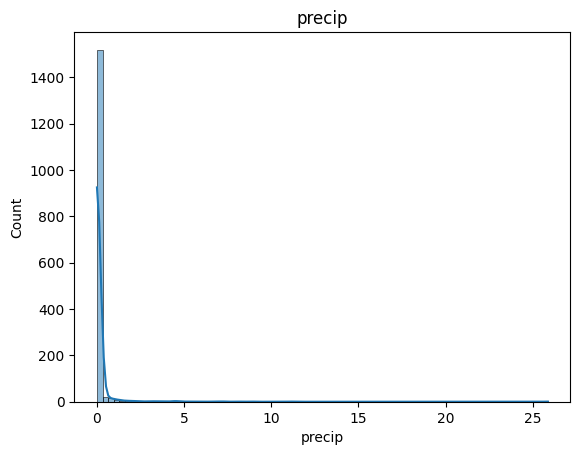

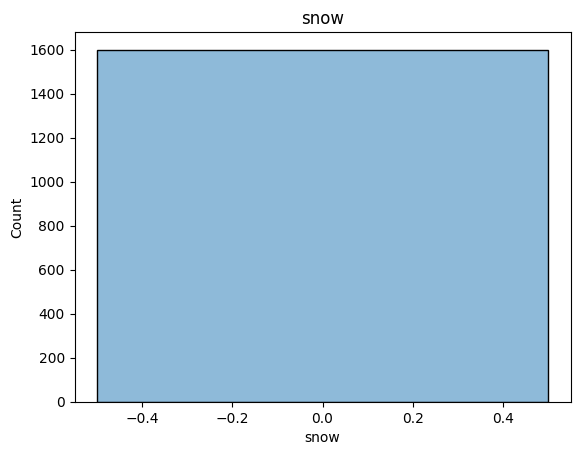

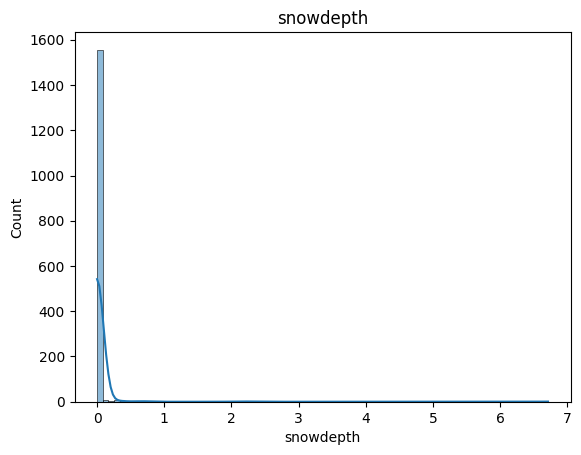

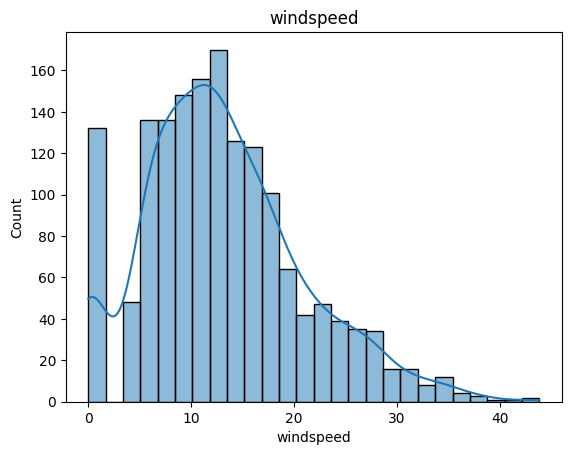

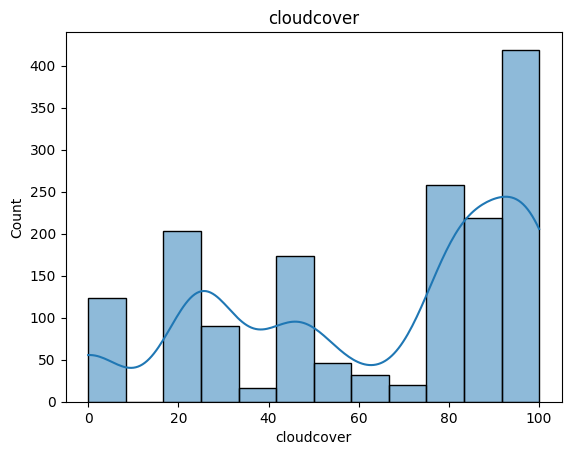

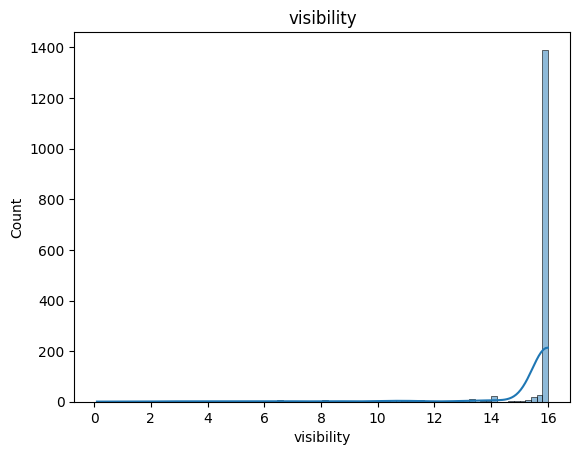

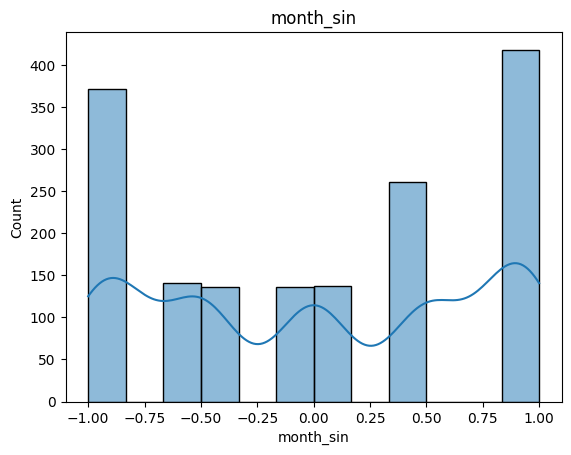

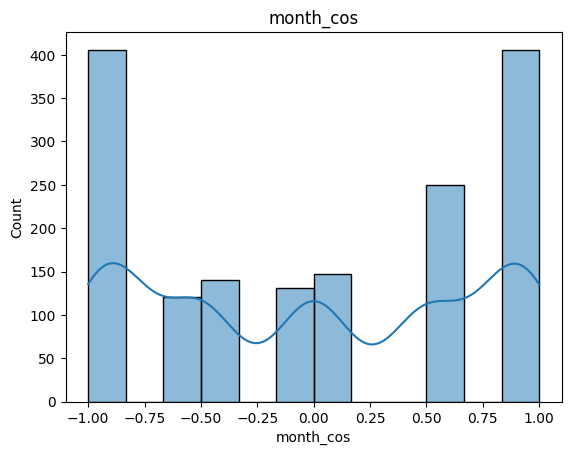

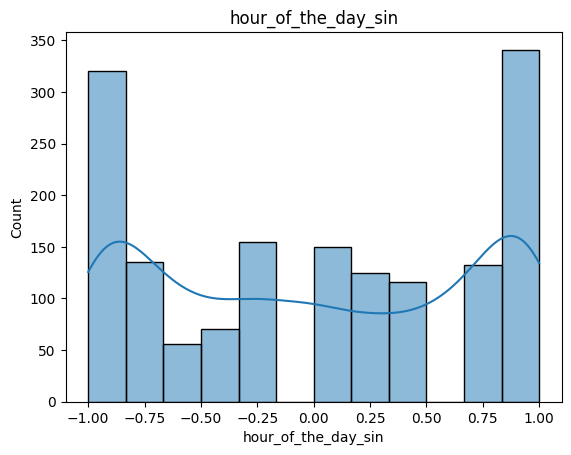

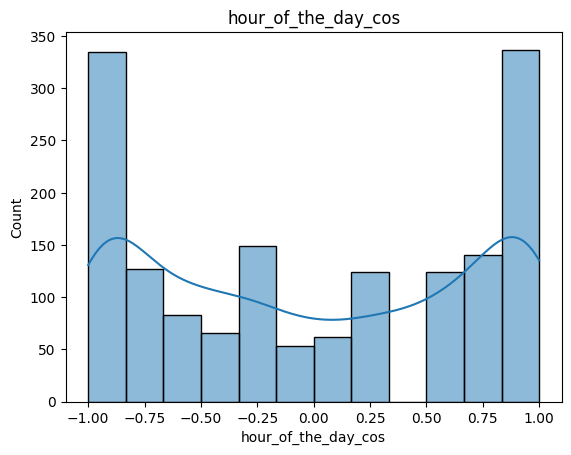

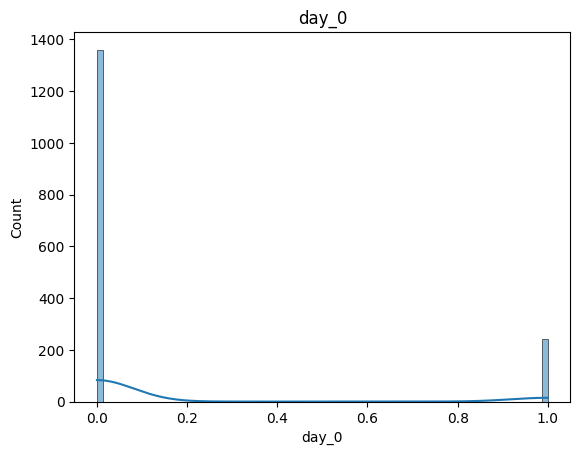

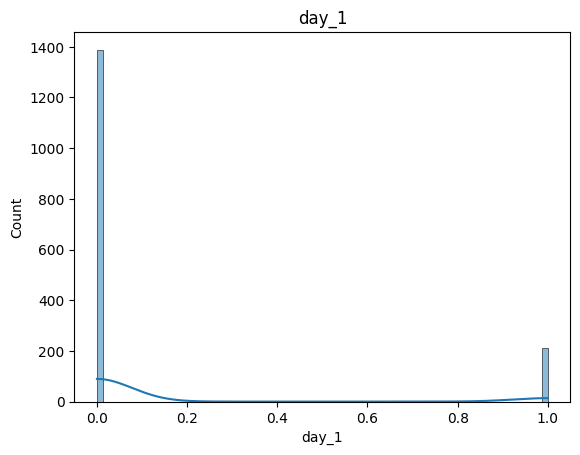

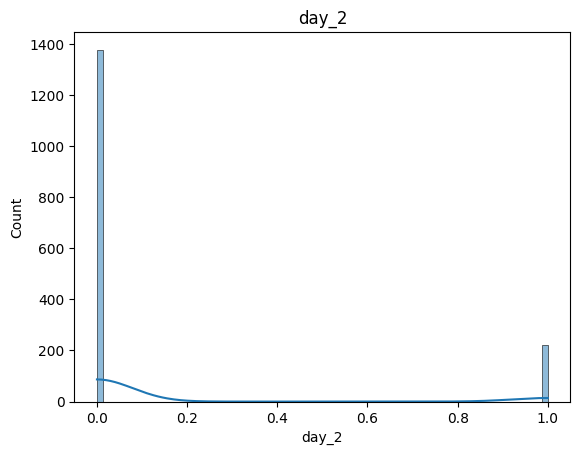

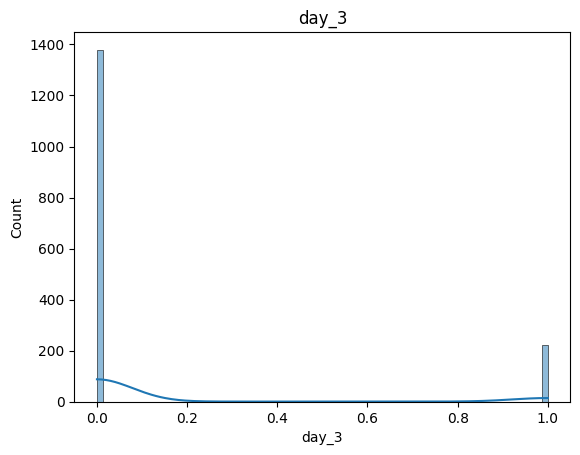

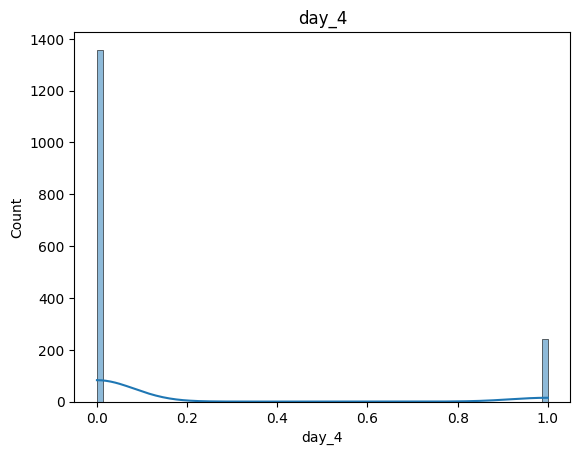

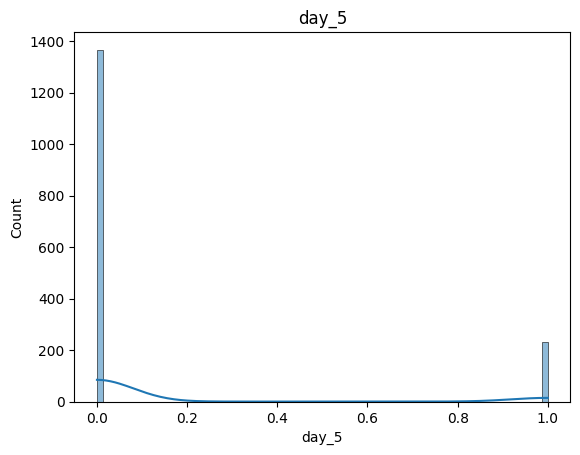

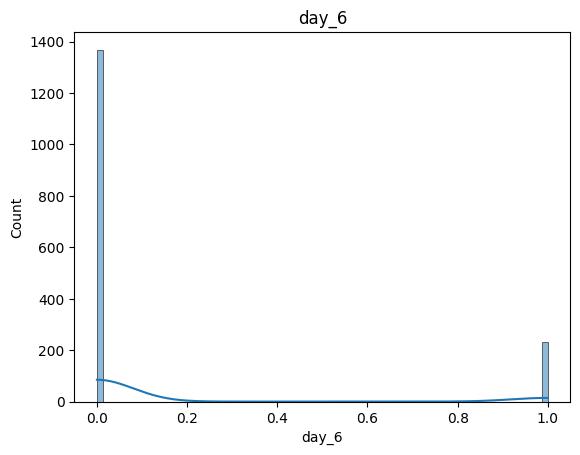

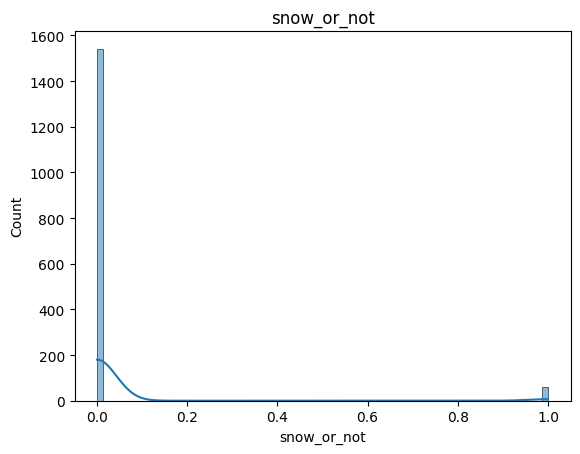

In [130]:
!pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt

for col in X.columns:
    sns.histplot(X[col], kde=True)
    plt.title(col)
    plt.show()


In [ ]:
#LDA for sclaed data
lda = skl_da.LinearDiscriminantAnalysis()
lda.fit(X_scaled, y)


In [ ]:

def qda_kfold(df, X, X_scaled):
    model = skl_da.QuadraticDiscriminantAnalysis(reg_param=0.6) # makes model more stabel by adding more weight to the diagonal of the covariance matrix. Less accurate
    n_folds = 10
    cv = skl_ms.KFold(n_splits=n_folds, shuffle=True, random_state=0)

    errors_folded_qda = []
    for train_index, val_index in cv.split(df):
        x_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        model.fit(x_train, y_train)
        folded_accuracy = model.score(X_val, y_val)
        error = 1 - folded_accuracy
        errors_folded_qda.append(error)
    mean_error_qda = float(np.mean(errors_folded_qda))
    #print(f"Mean error across {n_folds} folds, unscaled: {mean_error:.4f}")

    errors_folded_qda_scaled = []
    for train_index, val_index in cv.split(df):
        x_train, X_val = X_scaled.iloc[train_index], X_scaled.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        model.fit(x_train, y_train)
        folded_accuracy = model.score(X_val, y_val)
        error = 1 - folded_accuracy
        errors_folded_qda_scaled.append(error)
    mean_error_qda_scaled = float(np.mean(errors_folded_qda_scaled))
   # print(f"Mean error across {n_folds} folds, scaled: {mean_error:.4f}")

    return f"unscaled: {mean_error_qda:.4f}, scaled: {mean_error_qda_scaled:.4f}"

print(qda_kfold(df, X, X_scaled))

In [ ]:
def qda(df, X, X_scaled):
    model = skl_da.QuadraticDiscriminantAnalysis(reg_param=0.6) # makes model more stabel by adding more weight to the diagonal of the covariance matrix. Less accurate

    train_indexes, test_indices = skl_ms.train_test_split(range(len(X)), test_size=0.2, random_state=42)
    X_train, X_test = X.iloc[train_indexes], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indexes], y.iloc[test_indices]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    error_unscaled = 1 - accuracy

    X_train, X_test = X_scaled.iloc[train_indexes], X_scaled.iloc[test_indices]
    y_train, y_test = y.iloc[train_indexes], y.iloc[test_indices]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    error_scaled = 1 - accuracy
    return f"unscaled: {error_unscaled:.4f}, scaled: {error_scaled:.4f}"
print(qda(df, X, X_scaled))

In [ ]:
def lda_kfold_(df, X, X_scaled):
  model = skl_da.LinearDiscriminantAnalysis()
  n_folds = 10
  cv = skl_ms.KFold(n_splits=n_folds, shuffle=True, random_state=0)

  errors_folded = []
  for train_index, val_index in cv.split(df):
    x_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    model.fit(x_train, y_train)
    folded_accuracy = model.score(X_val, y_val)
    error = 1 - folded_accuracy
    errors_folded.append(error)
  mean_error = np.mean(errors_folded)

  errors_folded_scaled = []
  for train_index, val_index in cv.split(df):
    x_train, X_val = X_scaled.iloc[train_index], X_scaled.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    model.fit(x_train, y_train)
    folded_accuracy = model.score(X_val, y_val)
    error = 1 - folded_accuracy
    errors_folded_scaled.append(error)
  mean_error_scaled = np.mean(errors_folded_scaled)
  return f"unscaled: {mean_error:.4f}, scaled: {mean_error_scaled:.4f}"
print(lda_kfold(df, X, X_scaled))

In [ ]:
  
def lda(df, X, y, X_scaled):
    model = skl_da.LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.5)
    train_indexes, test_indices = skl_ms.train_test_split(range(len(X)), test_size=0.2, random_state=42)
    X_train, X_test = X.iloc[train_indexes], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indexes], y.iloc[test_indices]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    error = 1 - accuracy
    print(classification_report(y_test, y_pred)
    )

    X_train, X_test = X_scaled.iloc[train_indexes], X_scaled.iloc[test_indices]
    y_train, y_test = y.iloc[train_indexes], y.iloc[test_indices]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    error_scaled = 1 - accuracy
    return f"unscaled: {error:.4f}, scaled: {error_scaled:.4f}"
print(lda(df, X, y, X_scaled))

In [ ]:
def qda_kfold_auto(X, y, X_scaled):
    # QDA med jämna priors
    model = skl_da.QuadraticDiscriminantAnalysis(reg_param=0.6) 
    n_folds = 10

    # Cross-validation utan skalning
    scores_unscaled = cross_val_score(model, X, y, cv=n_folds)
    mean_error_unscaled = 1 - np.mean(scores_unscaled)

    # Cross-validation med skalad data
    scores_scaled = cross_val_score(model, X_scaled, y, cv=n_folds)
    mean_error_scaled = 1 - np.mean(scores_scaled)

    # Prediktioner för classification report (utan skalning)
    y_pred_unscaled = cross_val_predict(model, X, y, cv=n_folds)
    #print("Classification report (unscaled):")
    #print(classification_report(y, y_pred_unscaled))

    # Prediktioner för classification report (med skalning)
    y_pred_scaled = cross_val_predict(model, X_scaled, y, cv=n_folds)
    print("Classification report (scaled):")
    print(classification_report(y, y_pred_scaled))

    #return f"unscaled error: {mean_error_unscaled:.4f}, scaled error: {mean_error_scaled:.4f}"

# Kör funktionen

# - Pipeline ----------------------------------------------

In [ ]:
def lda_kfold_auto(X, y, X_scaled):
    model = skl_da.LinearDiscriminantAnalysis(priors=[0.5, 0.5], solver='lsqr', shrinkage=0.5)
    n_folds = 10
    # Cross-validation utan skalning
    scores_unscaled = cross_val_score(model, X, y, cv=n_folds)
    mean_error_unscaled = 1 - np.mean(scores_unscaled)

    # Cross-validation med skalad data
    scores_scaled = cross_val_score(model, X_scaled, y, cv=n_folds)
    mean_error_scaled = 1 - np.mean(scores_scaled)

    # Prediktioner för classification report (utan skalning)
    y_pred_unscaled = cross_val_predict(model, X, y, cv=n_folds)
    #print("Classification report (unscaled):")
    #print(classification_report(y, y_pred_unscaled))

    # Prediktioner för classification report (med skalning)
    y_pred_scaled = cross_val_predict(model, X_scaled, y, cv=n_folds)
    print("Classification report (scaled):")
    print(classification_report(y, y_pred_scaled))

    #return f"unscaled error: {mean_error_unscaled:.4f}, scaled error: {mean_error_scaled:.4f}"
#print(lda_kfold_auto(X, y, X_scaled))